# Major Project

# Problem Statement: 
You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

# Features:

* Name: The brand and model of the car.

* Location: The location in which the car is being sold or is available for purchase.

* Year: The year or edition of the model.

* Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

* Fuel_Type: The type of fuel used by the car.

* Transmission: The type of transmission used by the car.

* Owner_Type: Whether the ownership is Firsthand, Second hand or other.

* Mileage: The standard mileage offered by the car company in kmpl or km/kg

* Engine: The displacement volume of the engine in cc.

* Power: The maximum power of the engine in bhp.

* Seats: The number of seats in the car.

* Price: The price of the used car in INR Lakhs.

We have to predict the price of used cars from the data given. It is an example of regression. 
Regression is a statistical technique used to model continuous target variables. It has also been adopted to Machine Learning to predict continuous variables.

# This project is divided into 5 subsections as follows:
* Data collection
* Data cleaning
* Exploratory Data Analysis
* Regression Model and Evaluation
* Further improvement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Note: The file is changed from xlsx to csv format

In [2]:
data=pd.read_csv("Data_Train.csv")
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [3]:
data.shape

(6019, 12)

In [4]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


* To check null values present in the data set:

In [6]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
data.dropna(how='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


There are no rows in which all values are not filled. So no rows are removed. Also the null values present in the data set are negligible when compared to all the values. 

In [8]:
data['Mileage'].fillna(value='0 kmpl', inplace=True)
data['Engine'].fillna(value='0 CC', inplace=True)
data['Power'].fillna(value='0 bhp', inplace=True)
data['Seats'].fillna(value='5.0', inplace=True)

Since the null values in the each column is less than 1% of the total. It is not totally eliminated and filled with zero or standard value in case of seats.

In [9]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
Company=data['Name'].apply(lambda x : x.split(' ')[0])
data.insert(1,"Company_Name",Company)
data.head()

,Name,Company_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


In [11]:
model=data['Name'].apply(lambda x: x.split(' ')[1])
data.insert(2,"Model",model)
data.head()

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


In [12]:
data.loc[data.duplicated()]

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


## There is no duplicated data

In [13]:
data.columns

Index(['Name', 'Company_Name', 'Model', 'Location', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

# Visual summary of each features:
The total number of data entries in the data set is 6020. Now let us visualize each feature. The features include: Company, Location, Year, Kilometres driven, Fuel type used, Owner type, Mileage, Engine, Power, Seats and Price.

# 1. Company:

In [14]:
data['Company_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [15]:
data.Company_Name = data.Company_Name.str.lower()

def replace_name(a,b):
    data.Company_Name.replace(a,b,inplace=True)

replace_name('land','land rover')
replace_name('mini','mini cooper')
replace_name('jeep','jeep compass')
replace_name('smart','smart fortuo')
replace_name('force','force one')

In [16]:
data.Company_Name.value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land rover         60
jaguar             40
fiat               28
mitsubishi         27
mini cooper        26
volvo              21
porsche            18
jeep compass       15
datsun             13
isuzu               3
force one           3
lamborghini         1
smart fortuo        1
ambassador          1
bentley             1
Name: Company_Name, dtype: int64

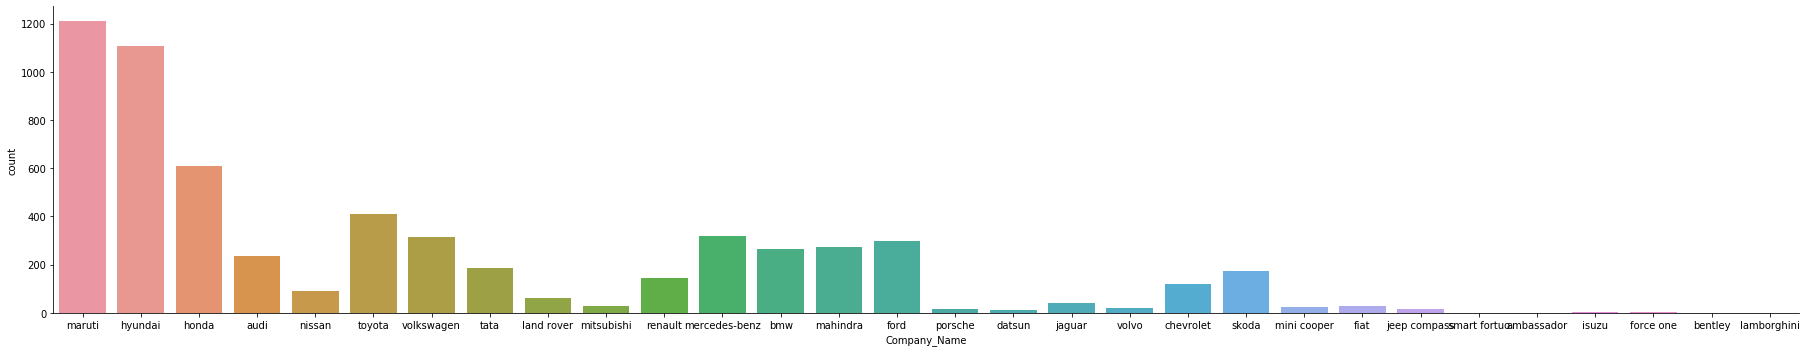

In [17]:
sns.catplot(x="Company_Name",kind='count',data=data,aspect=5)

## * Maruti and Hyundai are the most sought after company
## * There is 1 used car in these companies: Lamborghini, Ambassador, Bentley and Smart Fortuo 

In [18]:
# Model:
data.Model.unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
       'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
       'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
       'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman'

# 2. Location:

In [19]:
data.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

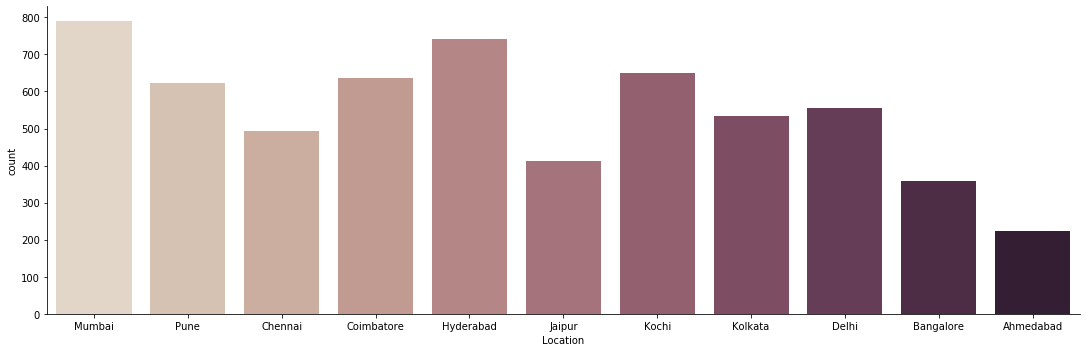

In [20]:
sns.catplot(x="Location", kind="count", palette="ch:.25", data=data, aspect=3)

## The most used cars available for sale are from Mumbai and Hyderabad and the least is from Ahmedabad

# 3. Year:

In [21]:
#Year is an ordinal variable
data.Year.value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

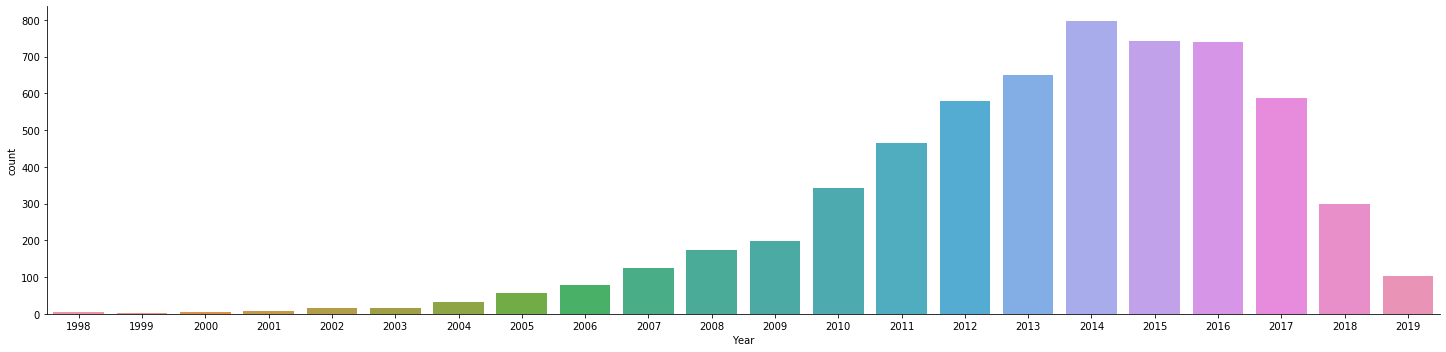

In [22]:
sns.catplot(x="Year",kind='count',data=data,aspect=4)

# 4. Kilometers driven:


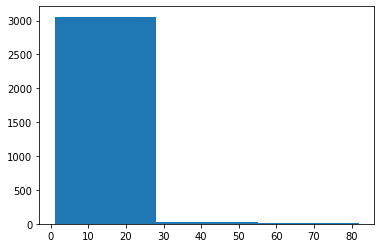

In [23]:
x=data.Kilometers_Driven.value_counts()
plt.hist(x,bins=3)
plt.show()

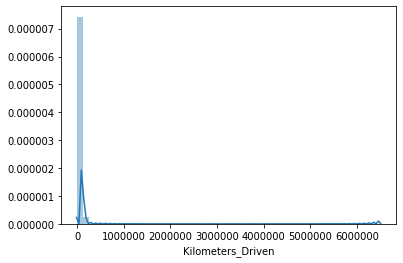

In [24]:
sns.distplot(data['Kilometers_Driven'],kde=True)

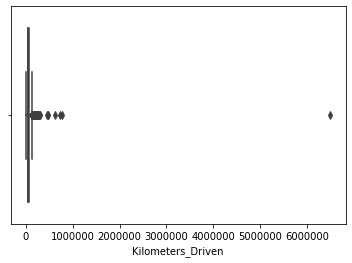

In [25]:
sns.boxplot(data['Kilometers_Driven'])

In [26]:
data[data['Kilometers_Driven']>=500000]

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,skoda,Octavia,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5,7.5
358,Hyundai i10 Magna 1.2,hyundai,i10,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5,2.7
1860,Volkswagen Vento Diesel Highline,volkswagen,Vento,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5,5.9
2328,BMW X5 xDrive 30d M Sport,bmw,X5,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5,65.0


## There are 4 outliers in the kilometers driven category

# 5.Fuel Type Used:

In [27]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

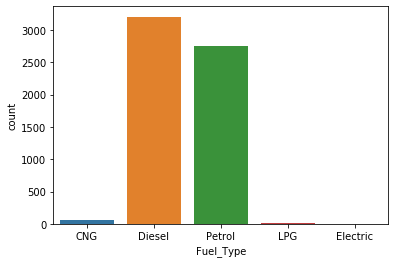

In [28]:
sns.countplot(x="Fuel_Type",data=data)

## The fuel type are mostly diesel and petrol

# 6.Transmission:

In [29]:
data.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

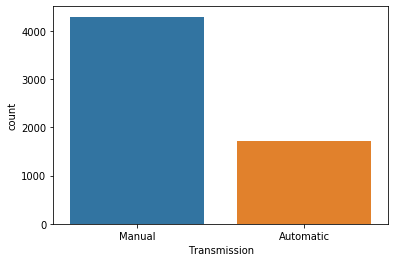

In [30]:
sns.countplot(x="Transmission",data=data)

## Almost 71% of the used cars are manual type

# 7. Type of owner

In [31]:
data.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

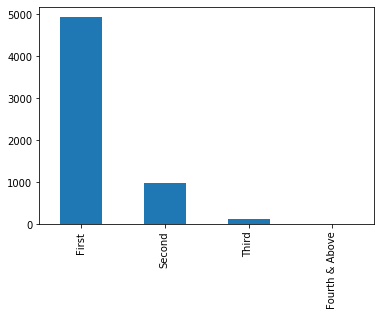

In [32]:
data.Owner_Type.value_counts().plot(kind='bar')

## Owners of the used cars are majorly first type owners

In [33]:
Mileage=data['Mileage'].apply(lambda x : x.split(' ')[0])
data.insert(8,"Mileage(in kmpl)",Mileage)
data.drop(['Mileage'],axis=1,inplace=True)
data.head()

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Owner_Type,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.6,First,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,First,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.2,First,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,First,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.2,Second,1968 CC,140.8 bhp,5,17.74


In [34]:
Engine=data['Engine'].apply(lambda x : x.split(' ')[0])
data.insert(9,"Engine(in CC)",Engine)
data.drop(['Engine'],axis=1,inplace=True)
data.head()

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Owner_Type,Power,Seats,Price
0,Maruti Wagon R LXI CNG,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.6,998,First,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,1582,First,126.2 bhp,5,12.50
2,Honda Jazz V,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.2,1199,First,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,1248,First,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.2,1968,Second,140.8 bhp,5,17.74


In [35]:
Power=data['Power'].apply(lambda x : x.split(' ')[0])
data.insert(10,"Power(in bhp)",Power)
data.drop(['Power'],axis=1,inplace=True)
data.head()

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
0,Maruti Wagon R LXI CNG,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.6,998,58.16,First,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,1582,126.2,First,5,12.50
2,Honda Jazz V,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.2,1199,88.7,First,5,4.50
3,Maruti Ertiga VDI,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,1248,88.76,First,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.2,1968,140.8,Second,5,17.74


# 8.Mileage (in kmpl):

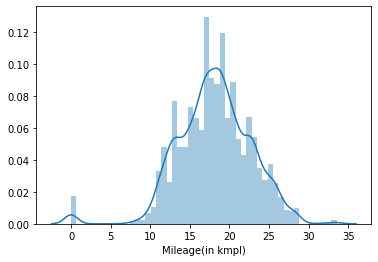

In [36]:
sns.distplot(data['Mileage(in kmpl)'],kde=True)

## Mileage is not very important. It is a parameter that least affects the data.

# 9.Engine (in CC):

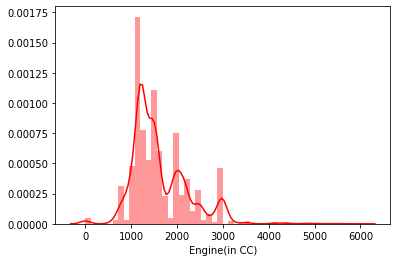

In [37]:
sns.distplot(data['Engine(in CC)'],kde=True,color='r')

# 10.Seats:

In [38]:
data.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
5.0       42
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

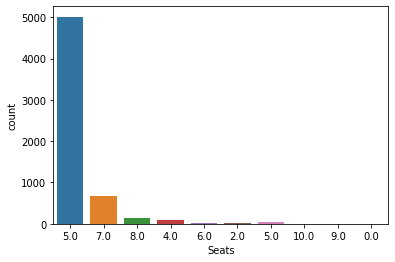

In [39]:
sns.countplot(x="Seats",data=data)

## Nearly 84% of the used cars are 5 seaters

# 11.Price:

In [40]:
print("The highest price is: ",data.Price.max(), "in INR lakhs")
print("The lowest price is: ",data.Price.min(), "in INR lakhs")

The highest price is:  160.0 in INR lakhs
The lowest price is:  0.44 in INR lakhs


(array([5.098e+03, 6.190e+02, 2.000e+02, 6.400e+01, 2.900e+01, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.44 ,  16.396,  32.352,  48.308,  64.264,  80.22 ,  96.176,
        112.132, 128.088, 144.044, 160.   ]),
 <a list of 1 Patch objects>)

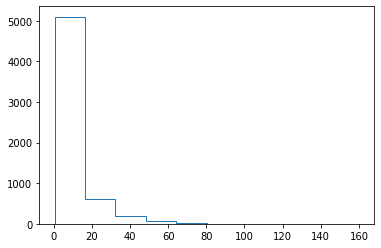

In [41]:
plt.hist(data['Price'],histtype='step')

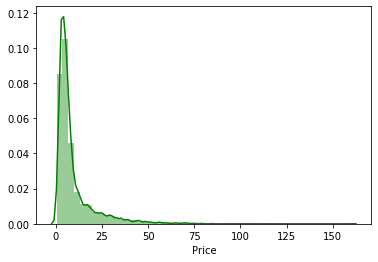

In [42]:
sns.distplot(data['Price'],kde=True, color='g')

In [43]:
print(data.Price.describe(percentiles = [0.10,0.25,0.30,0.50,0.60,0.75,0.85,0.90,1]))

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
10%         2.300000
25%         3.500000
30%         3.850000
50%         5.640000
60%         6.750000
75%         9.950000
85%        16.500000
90%        22.500000
100%      160.000000
max       160.000000
Name: Price, dtype: float64


In [44]:
data.Price.nunique()

1373

In [45]:
data[data.Price<=50]

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
0,Maruti Wagon R LXI CNG,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.6,998,58.16,First,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,1582,126.2,First,5,12.50
2,Honda Jazz V,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.2,1199,88.7,First,5,4.50
3,Maruti Ertiga VDI,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,1248,88.76,First,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.2,1968,140.8,Second,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,maruti,Swift,Delhi,2014,27365,Diesel,Manual,28.4,1248,74,First,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,hyundai,Xcent,Jaipur,2015,100000,Diesel,Manual,24.4,1120,71,First,5,4.00
6016,Mahindra Xylo D4 BSIV,mahindra,Xylo,Jaipur,2012,55000,Diesel,Manual,14.0,2498,112,Second,8,2.90
6017,Maruti Wagon R VXI,maruti,Wagon,Kolkata,2013,46000,Petrol,Manual,18.9,998,67.1,First,5,2.65


In [46]:
data[data.Price<=25]

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
0,Maruti Wagon R LXI CNG,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.6,998,58.16,First,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,1582,126.2,First,5,12.50
2,Honda Jazz V,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.2,1199,88.7,First,5,4.50
3,Maruti Ertiga VDI,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,1248,88.76,First,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.2,1968,140.8,Second,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,maruti,Swift,Delhi,2014,27365,Diesel,Manual,28.4,1248,74,First,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,hyundai,Xcent,Jaipur,2015,100000,Diesel,Manual,24.4,1120,71,First,5,4.00
6016,Mahindra Xylo D4 BSIV,mahindra,Xylo,Jaipur,2012,55000,Diesel,Manual,14.0,2498,112,Second,8,2.90
6017,Maruti Wagon R VXI,maruti,Wagon,Kolkata,2013,46000,Petrol,Manual,18.9,998,67.1,First,5,2.65


In [47]:
data[data.Price>=100]

,Name,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,land rover,Rover,Hyderabad,2017,25000,Diesel,Automatic,13.33,2993,255,First,5,160.0
5781,Lamborghini Gallardo Coupe,lamborghini,Gallardo,Delhi,2011,6500,Petrol,Automatic,6.4,5204,560,Third,2,120.0
5919,Jaguar F Type 5.0 V8 S,jaguar,F,Hyderabad,2015,8000,Petrol,Automatic,12.5,5000,488.1,First,2,100.0


## The graph is right skewed (ie) the price of the cars are mostly below 50 lakhs. Almost 98% of the used cars are less than or equal to 50 lakhs. In that, 93% of the cars cost less than 25 lakhs. 

# Exploratory Data Analysis:
## Detailed Analysis with visualization:

Q1 value= 3.5
Q3 value= 9.95
IQR= 6.449999999999999
Upper whisker limit= 19.625
Lower whisker limit= -6.174999999999999


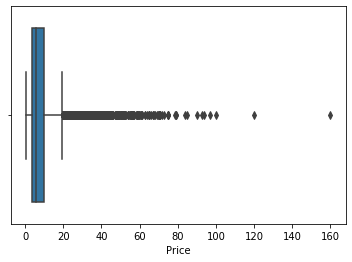

In [48]:
sns.boxplot(data['Price'])
Q3=data.Price.quantile(.75)
Q1=data.Price.quantile(.25)
IQR=Q3-Q1
print("Q1 value=",Q1)
print("Q3 value=",Q3)
print("IQR=",IQR)
print("Upper whisker limit=",(Q3+ (1.5*IQR)))
print("Lower whisker limit=",(Q1- (1.5*IQR)))

# Visualizing Categorical Data:

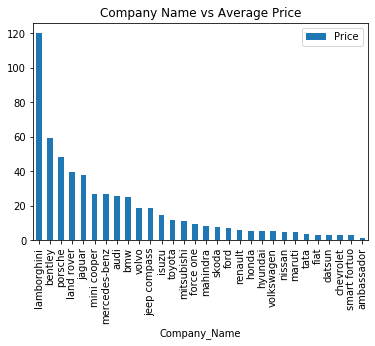

In [49]:
df = pd.DataFrame(data.groupby(['Company_Name'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

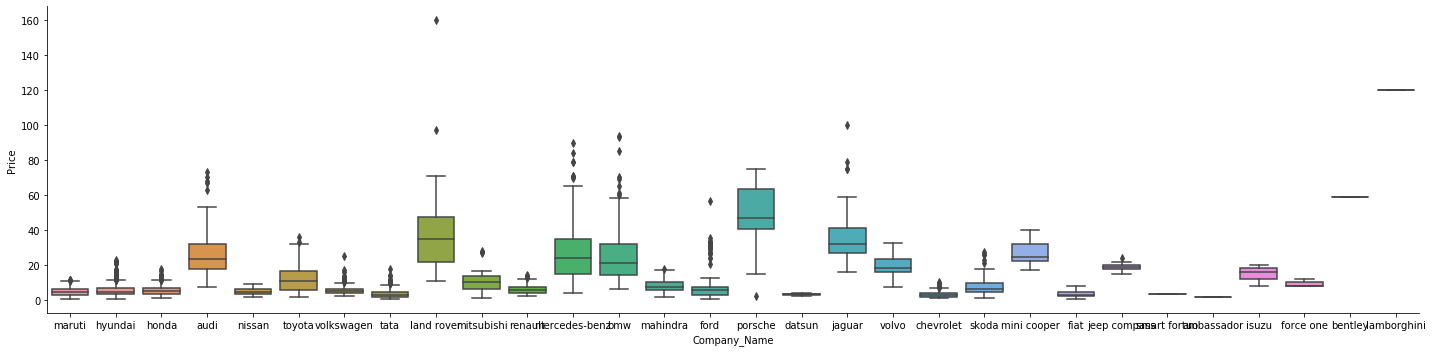

In [50]:
sns.catplot(x="Company_Name",y='Price',data=data,kind='box',aspect=4)

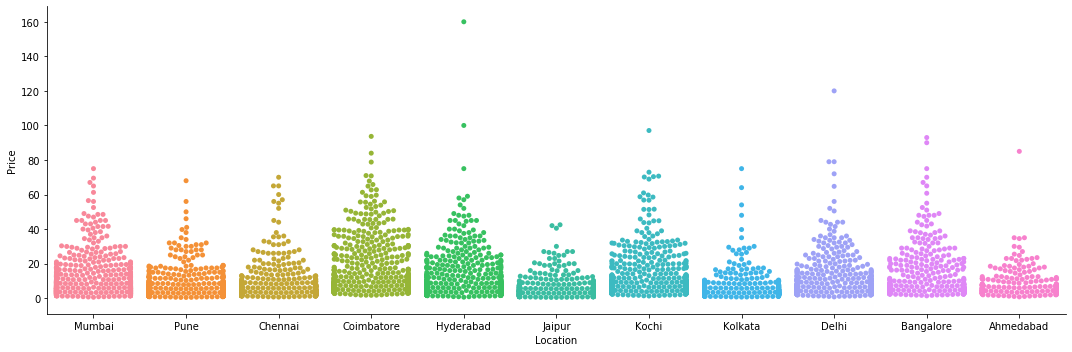

In [51]:
sns.catplot(x='Location',y='Price',data=data,kind='swarm',aspect=3)

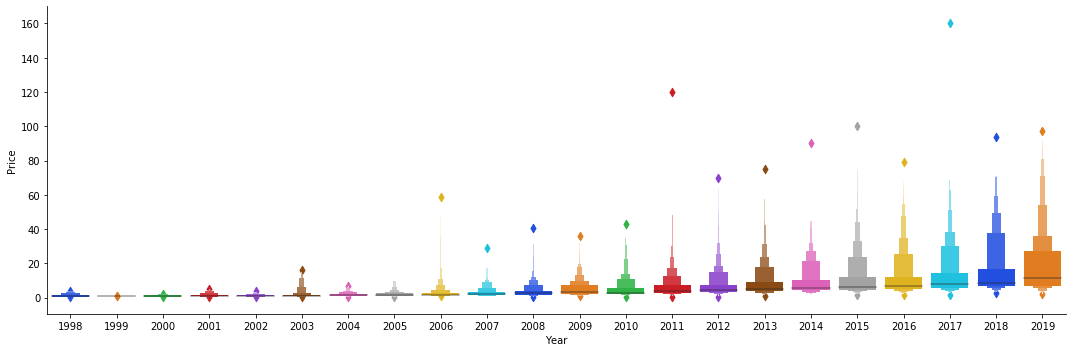

In [52]:
sns.catplot(x="Year", y="Price", kind="boxen",data=data.sort_values("Year"),aspect=3,palette='bright')

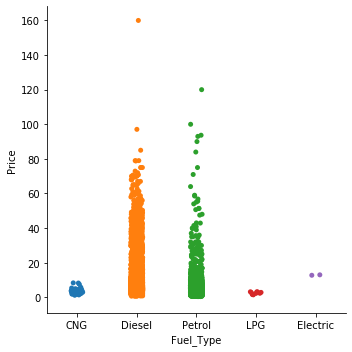

In [53]:
sns.catplot(x='Fuel_Type',y='Price',data=data)

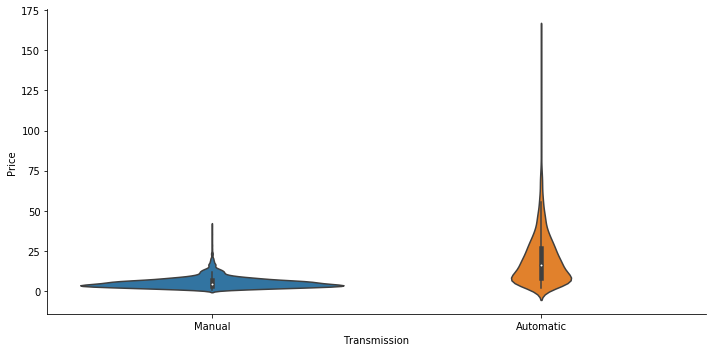

In [54]:
sns.catplot(x='Transmission',y='Price',data=data,kind='violin',aspect=2)

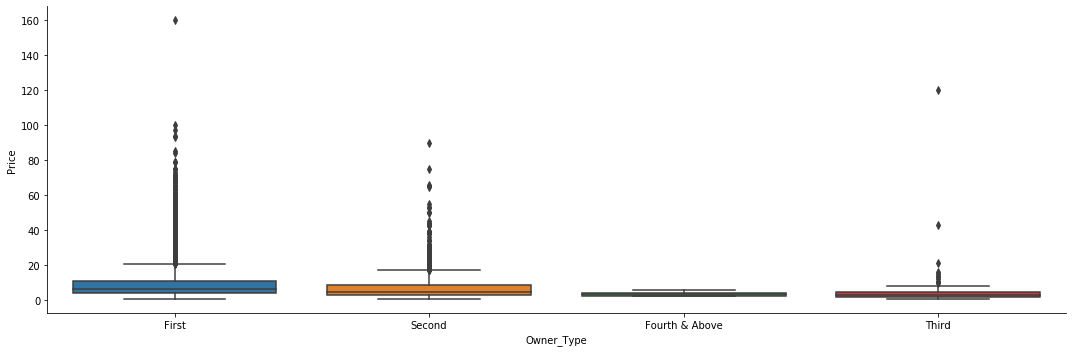

In [55]:
sns.catplot(x='Owner_Type',y='Price',data=data,kind='box',aspect=3)

# Visualizing Numerical Data:

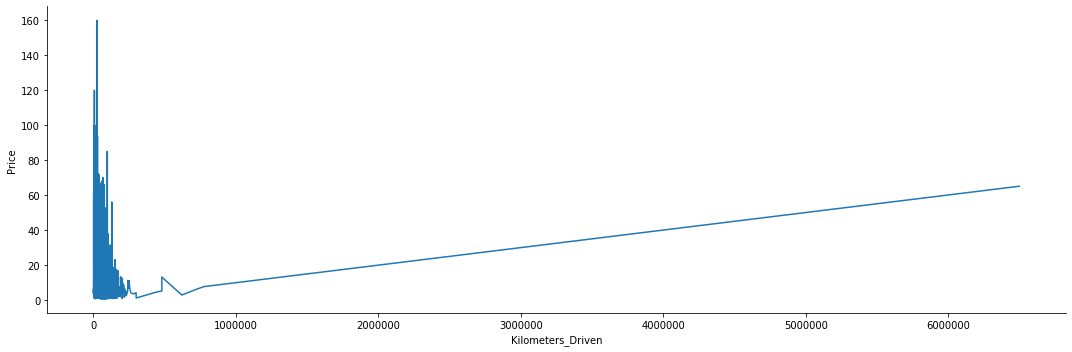

In [56]:
sns.relplot(x="Kilometers_Driven", y="Price", estimator=None, kind="line", data=data,aspect=3)

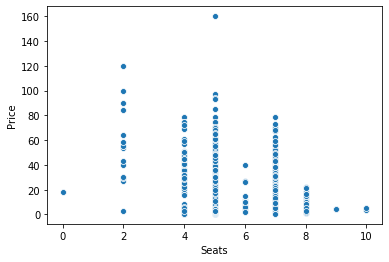

In [57]:
sns.scatterplot(x="Seats",y='Price',data=data)

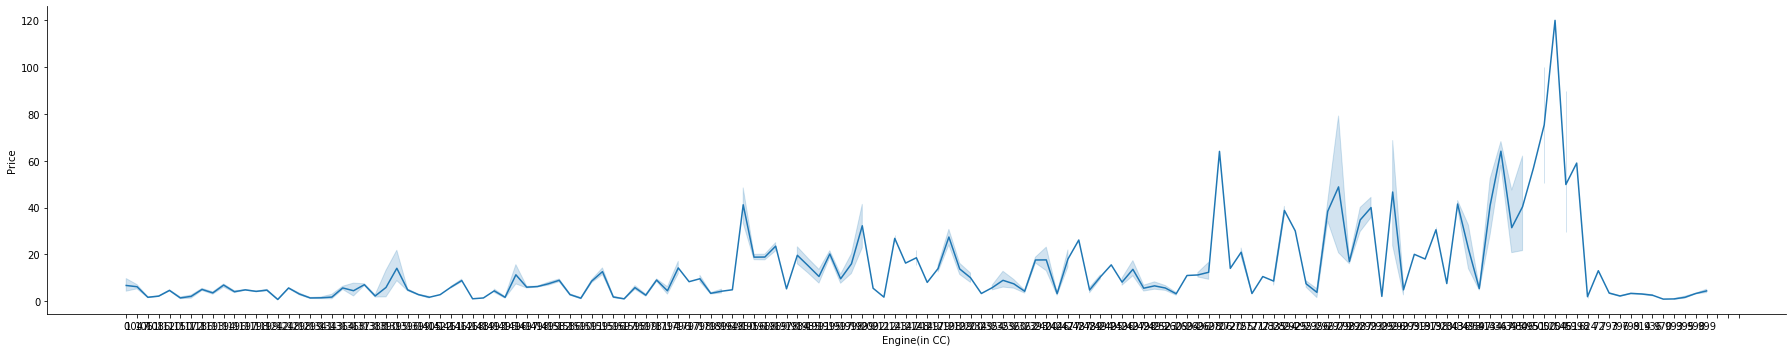

In [58]:
sns.relplot(x="Engine(in CC)",y='Price',data=data,aspect=5,kind='line')
plt.xticks(range(150))
plt.savefig('Engine Vs Price'+".png")

In [59]:
data.dtypes

Name                  object
Company_Name          object
Model                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Mileage(in kmpl)      object
Engine(in CC)         object
Power(in bhp)         object
Owner_Type            object
Seats                 object
Price                float64
dtype: object

In [60]:
data['Mileage(in kmpl)']=data['Mileage(in kmpl)'].astype(str).astype(float)
data['Engine(in CC)']=data['Engine(in CC)'].astype(str).astype(float)
data['Seats']=data['Seats'].astype(str).astype(float)
data.dtypes

Name                  object
Company_Name          object
Model                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Mileage(in kmpl)     float64
Engine(in CC)        float64
Power(in bhp)         object
Owner_Type            object
Seats                float64
Price                float64
dtype: object

### Label Encoding categorical data:

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land rover', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini cooper', 'fiat',
       'jeep compass', 'smart fortuo', 'ambassador', 'isuzu', 'force one',
       'bentley', 'lamborghini')
bridge_df = pd.DataFrame(bridge_types, columns=['Cars'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Car_Ranked'] = labelencoder.fit_transform(bridge_df['Cars'])
bridge_df

,Cars,Car_Ranked
0,maruti,17
1,hyundai,10
2,honda,9
3,audi,1
4,nissan,21
5,toyota,27
6,volkswagen,28
7,tata,26
8,land rover,15
9,mitsubishi,20


In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
location = ('Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad')
location = pd.DataFrame(location, columns=['location'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
location['location_ranked'] = labelencoder.fit_transform(location['location'])
location

,location,location_ranked
0,Mumbai,9
1,Pune,10
2,Chennai,2
3,Coimbatore,3
4,Hyderabad,5
5,Jaipur,6
6,Kochi,7
7,Kolkata,8
8,Delhi,4
9,Bangalore,1


In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
ridge_types = ('Manual', 'Automatic')
ridge_df = pd.DataFrame(ridge_types, columns=['Transmission'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ridge_df['Transmission_ranked'] = labelencoder.fit_transform(ridge_df['Transmission'])
ridge_df

,Transmission,Transmission_ranked
0,Manual,1
1,Automatic,0


In [64]:
data.drop(['Name'], axis=1, inplace=True)
data.head()

,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
0,maruti,Wagon,Mumbai,2010,72000,CNG,Manual,26.60,998.0,58.16,First,5.0,1.75
1,hyundai,Creta,Pune,2015,41000,Diesel,Manual,19.67,1582.0,126.2,First,5.0,12.50
2,honda,Jazz,Chennai,2011,46000,Petrol,Manual,18.20,1199.0,88.7,First,5.0,4.50
3,maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,20.77,1248.0,88.76,First,7.0,6.00
4,audi,A4,Coimbatore,2013,40670,Diesel,Automatic,15.20,1968.0,140.8,Second,5.0,17.74


In [65]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Company_Name"] = lb_make.fit_transform(data["Company_Name"])
data["Location"] = lb_make.fit_transform(data["Location"])
data["Transmission"] = lb_make.fit_transform(data["Transmission"])
data["Fuel_Type"] = lb_make.fit_transform(data["Fuel_Type"])
data["Owner_Type"] = lb_make.fit_transform(data["Owner_Type"])
data["Model"]=lb_make.fit_transform(data["Model"])
data.head()

,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
0,17,189,9,2010,72000,0,1,26.60,998.0,58.16,0,5.0,1.75
1,10,53,10,2015,41000,1,1,19.67,1582.0,126.2,0,5.0,12.50
2,9,99,2,2011,46000,4,1,18.20,1199.0,88.7,0,5.0,4.50
3,17,69,2,2012,87000,1,1,20.77,1248.0,88.76,0,7.0,6.00
4,1,10,3,2013,40670,1,0,15.20,1968.0,140.8,2,5.0,17.74


In [66]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Mileage(in kmpl)', 'Kilometers_Driven', 'Engine(in CC)', 'Year', 'Seats','Price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Niveddita\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Niveddita\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
df_train.head()

,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats,Price
2985,8,62,4,0.857143,0.007097,1,1,0.678891,0.249750,98.59,0,0.375,0.068401
2269,17,25,9,0.904762,0.002299,4,1,0.638044,0.199567,83.1,0,0.375,0.052330
3059,3,2,4,1.000000,0.013294,1,0,0.676506,0.332611,190,0,0.375,0.062575
2098,10,91,0,0.809524,0.003105,4,1,0.563506,0.199567,81.86,0,0.375,0.038771
3578,17,25,8,0.857143,0.002985,4,0,0.638044,0.199567,83.1,0,0.375,0.053234


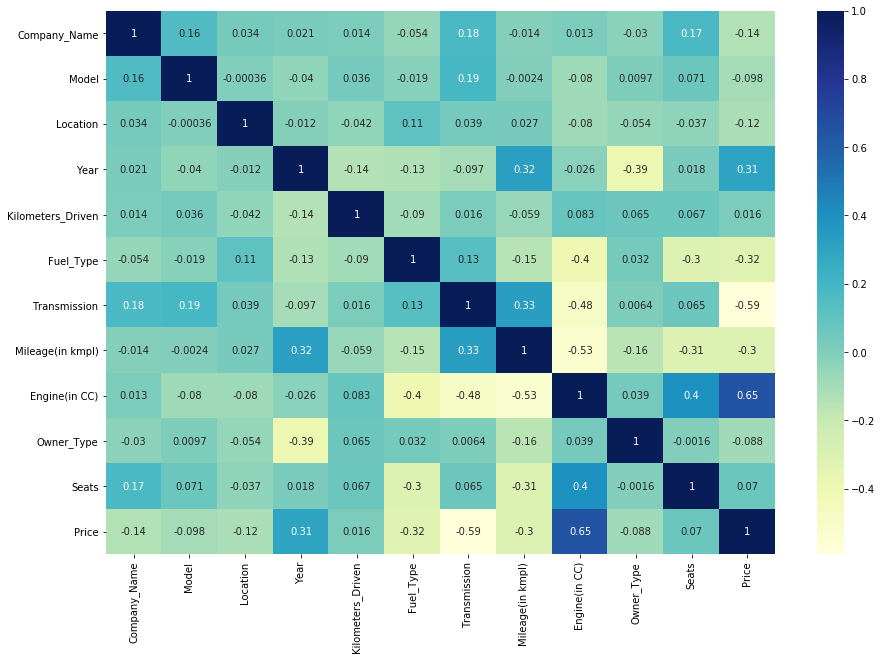

In [69]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Using two regression models, the price is predicted using independent variables. The two regression models are OLS regression model and random forest regression.

# OLS Regression Model:

In [70]:
predictors=data['Engine(in CC)']
target=data['Price']

In [71]:
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4338.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:08   Log-Likelihood:                -21441.
No. Observations:                6019   AIC:                         4.289e+04
Df Residuals:                    6017   BIC:                         4.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.5747      0.309    -30.937

In [72]:
predictors=data.drop('Price',axis=1)
target=data.Price
predictors1=predictors['Engine(in CC)']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4338.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:08   Log-Likelihood:                -21441.
No. Observations:                6019   AIC:                         4.289e+04
Df Residuals:                    6017   BIC:                         4.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.5747      0.309    -30.937

In [73]:
predictors2=predictors[['Company_Name','Model','Engine(in CC)','Transmission','Fuel_Type']]
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1345.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:09   Log-Likelihood:                -20816.
No. Observations:                6019   AIC:                         4.164e+04
Df Residuals:                    6013   BIC:                         4.168e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7031      0.568     10.043

In [74]:
predictors3=predictors[['Company_Name','Engine(in CC)','Model','Seats','Fuel_Type','Year','Location','Owner_Type']]
import statsmodels.api as sm
predictors3= sm.add_constant(predictors3)
lm_3 = sm.OLS(target,predictors3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1092.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:10   Log-Likelihood:                -20373.
No. Observations:                6019   AIC:                         4.076e+04
Df Residuals:                    6010   BIC:                         4.083e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2247.7794     62.278    -36.093

In [75]:
predictors4=predictors[['Engine(in CC)','Company_Name','Location','Transmission','Model','Year','Seats','Owner_Type','Kilometers_Driven']]
import statsmodels.api as sm
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1128.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:11   Log-Likelihood:                -20097.
No. Observations:                6019   AIC:                         4.021e+04
Df Residuals:                    6009   BIC:                         4.028e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2079.9934     60.19

In [76]:
predictors5=predictors[['Engine(in CC)','Company_Name','Location','Transmission','Model','Year','Seats','Owner_Type','Kilometers_Driven','Fuel_Type','Mileage(in kmpl)']]
import statsmodels.api as sm
predictors5= sm.add_constant(predictors5)
lm_5 = sm.OLS(target,predictors5).fit()
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     962.7
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:36:11   Log-Likelihood:                -20016.
No. Observations:                6019   AIC:                         4.006e+04
Df Residuals:                    6007   BIC:                         4.014e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2262.6054     63.65

In [77]:
data.shape

(6019, 13)

Text(0, 0.5, 'Car Price')

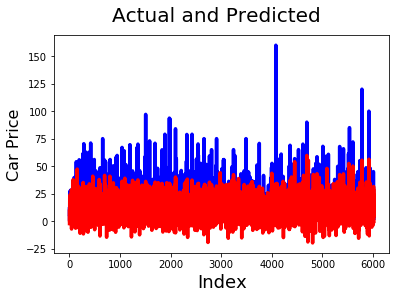

In [78]:
pred=lm_5.predict(predictors5)
# Actual vs Predicted
c = [i for i in range(1,6020,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)


## Using OLS regression model, we find that the maximum R2 score is 0.638 which is not that efficient. So we go for random forest regression.

# Random Forest Regression

In [79]:
train=data.iloc[:,:]
test=data.iloc[:,0:12]

In [80]:
test.head()

,Company_Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage(in kmpl),Engine(in CC),Power(in bhp),Owner_Type,Seats
0,17,189,9,2010,72000,0,1,26.60,998.0,58.16,0,5.0
1,10,53,10,2015,41000,1,1,19.67,1582.0,126.2,0,5.0
2,9,99,2,2011,46000,4,1,18.20,1199.0,88.7,0,5.0
3,17,69,2,2012,87000,1,1,20.77,1248.0,88.76,0,7.0
4,1,10,3,2013,40670,1,0,15.20,1968.0,140.8,2,5.0


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
train_y = train.Price
train_x = train.iloc[:,[0,1,2,3,4,5,6,7,8,10]]
test_x = test
train_X, val_X, train_Y, val_Y = train_test_split(train_x, train_y)
rf = RandomForestRegressor(criterion = "mae", random_state=1)
rf.fit(train_X, train_Y)
y_pred_part = rf.predict(val_X)
r2_score(y_pred_part, val_Y)

0.8155883071894585

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
train_y = train.Price
train_x = train.iloc[:,[0,1,3,4,5,6,8,10]]
test_x = test
train_X, val_X, train_Y, val_Y = train_test_split(train_x, train_y)
rf = RandomForestRegressor(criterion = "mae", random_state=1)
rf.fit(train_X, train_Y)
y_pred_part = rf.predict(val_X)
r2_score(y_pred_part, val_Y)

0.8476310116484645

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
train_y = train.Price
train_x = train.iloc[:,[0,1,2,3,4,5,6,8,10]]
test_x = test
train_X, val_X, train_Y, val_Y = train_test_split(train_x, train_y)
rf = RandomForestRegressor(criterion = "mae", random_state=1)
rf.fit(train_X, train_Y)
y_pred_part = rf.predict(val_X)
r2_score(y_pred_part, val_Y)



0.8683916742080877

Text(0, 0.5, 'y_pred')

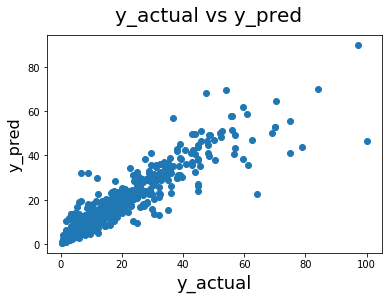

In [89]:
fig = plt.figure()
plt.scatter(val_Y,y_pred_part)
fig.suptitle('y_actual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_actual', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## The last random forest regressor has a R2 score of 0.868 which is approximately 0.87 which is very efficient when compared to OLS regressor.